## Analyze A/B Test Results

In this excercise we will understand the various statistical concepts like A/B hypothesis discussed in the module.



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  

In this project, we will be working to understand the results of an A/B test run by an e-commerce website. We will answer the labels for each classroom concept are provided for each question. 

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [4]:
df = pd.read_csv('ab_data.csv')
df.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

Top 5 rows data are shown above

b. Use the cell below to find the number of rows in the dataset.

In [5]:
df.shape

(294478, 5)

Number of rows in the data sets are 294478

In [6]:
#Checking more infor about the dataset
df.describe()

user_id      converted
count  294478.000000  294478.000000
mean   787974.124733       0.119659
std     91210.823776       0.324563
min    630000.000000       0.000000
25%    709032.250000       0.000000
50%    787933.500000       0.000000
75%    866911.750000       0.000000
max    945999.000000       1.000000

In [7]:
#to make a better sense of the description , transposing the description 
df.describe().T

count           mean           std       min        25%  \
user_id    294478.0  787974.124733  91210.823776  630000.0  709032.25   
converted  294478.0       0.119659      0.324563       0.0       0.00   

                50%        75%       max  
user_id    787933.5  866911.75  945999.0  
converted       0.0       0.00       1.0

Above data shows all user ids are associated with a conversion value ie.e either the are converted or not converted

c. The number of unique users in the dataset.

In [8]:
df.user_id.nunique()

290584

We have 290584 user ids are unique

d. The proportion of users converted.

In [9]:
df.converted.mean()

0.11965919355605512

Almost 12% user ids got converted (not unique users , but composite)

e. The number of times the `new_page` and `treatment` don't match.

To get the above answer , we need to sum up (group =  treatment  and landing page != new page) with (group !=  treatment  and landing page = new page)

In [10]:
a = len(df.query('group == "treatment" and landing_page != "new_page"')) + \
        len(df.query('group != "treatment" and landing_page == "new_page"'))

In [11]:
a

3893

So we got 3893 times treatment group does not match with new page , landing page

f. Do any of the rows have missing values?

In [12]:
df.isnull()

user_id  timestamp  group  landing_page  converted
0         False      False  False         False      False
1         False      False  False         False      False
2         False      False  False         False      False
3         False      False  False         False      False
4         False      False  False         False      False
...         ...        ...    ...           ...        ...
294473    False      False  False         False      False
294474    False      False  False         False      False
294475    False      False  False         False      False
294476    False      False  False         False      False
294477    False      False  False         False      False

[294478 rows x 5 columns]

In [13]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

None of the columns has missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  

a. New dataset is stored as df2.

To prepare the new data frame , i will create 2 separate data frames and then will concatenate

In [14]:
dfgt = df[(df.group == 'treatment') & (df.landing_page == 'new_page')] 
dfgc = df[(df.group == 'control') & (df.landing_page == 'old_page')]

In [15]:
# Now to get df2 , I will concatenate
df2 = pd.concat([dfgt,dfgc])
df2

user_id                   timestamp      group landing_page  converted
2        661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3        853541  2017-01-08 18:28:03.143765  treatment     new_page          0
6        679687  2017-01-19 03:26:46.940749  treatment     new_page          1
8        817355  2017-01-04 17:58:08.979471  treatment     new_page          1
9        839785  2017-01-15 18:11:06.610965  treatment     new_page          1
...         ...                         ...        ...          ...        ...
294471   718310  2017-01-21 22:44:20.378320    control     old_page          0
294473   751197  2017-01-03 22:28:38.630509    control     old_page          0
294474   945152  2017-01-12 00:51:57.078372    control     old_page          0
294475   734608  2017-01-22 11:45:03.439544    control     old_page          0
294476   697314  2017-01-15 01:20:28.957438    control     old_page          0

[290585 rows x 5 columns]

In [16]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Further questions and answers will refer to the new dataframe df2.

a. How many unique **user_id**s are in **df2**?

In [17]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [18]:
df2.duplicated(['user_id'])

2         False
3         False
6         False
8         False
9         False
          ...  
294471    False
294473    False
294474    False
294475    False
294476    False
Length: 290585, dtype: bool

Between 2 dataframes one user id is duplicated

In [19]:
df2[df2.duplicated(['user_id'], keep=False)]

user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

user id 773192 is duplicated

c. What is the row information for the repeat **user_id**? 

Looking at bothe the rows , it is observed that the same user accessed new page 1st on  9th Jan and 2nd time on 14th Jan.Rest all column values are same.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
#lets drop the duplicated row , keeping fist row whihc is unique
df2 = df2.drop_duplicates(keep = 'first')

`4.` df2 dataframe is used
a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
df2.converted.value_counts()[1]/len(df2.landing_page)

0.11959667567149027

For the above question , I got the around 12% of users got converted regardless of the landing page

b. Given that an individual was in the `control` group, what is the probability they converted?

I will use groupby method to get all converted user ids

In [22]:
df2.groupby(["group", "converted"]).size()[1] / df2.group.value_counts()[1]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
df2.query("group == 'treatment'").converted.mean()

0.11880724790277405

d. What is the probability that an individual received the new page?

In [24]:
df2.query("landing_page == 'new_page'").shape[0] / df2.landing_page.shape[0]

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Conversion of either page access by either treatment group or control group is almost 12%, which inferes that there no evidence that new page access relates to conversion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$p_{old}$ and $p_{new}$ are the converted rates for the old and new pages respectively.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation. 

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [25]:
p_new = df2.converted.mean()
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [26]:
p_old = df2.converted.mean()
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [27]:
new = df2.query("group == 'treatment'").shape[0]
new

145311

In the treatment group , there are 145311 , number of user ids.

d. What is $n_{old}$, the number of individuals in the control group?

In [28]:
old = df2.query("group == 'control'").shape[0]
old

145274

There are less number of individuals in the control group

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
#Simulatinging at the converted vs not converted due to new page
new_page_converted = np.random.choice([0, 1], size =new, p = [p_new, 1 - p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
#Simulatinging at the converted vs not converted due to old page
old_page_converted = np.random.choice([0, 1], size = old, p = [p_old, 1 - p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

0.001248620185154481

The difference is extremely negligible due to new page conversion

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [32]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size = new, p = [p_new, 1 - p_new]).mean()
    old_page_converted = np.random.choice([0, 1], size = old, p = [p_old, 1 - p_old]).mean()
    p_diffs.append(new_page_converted - old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

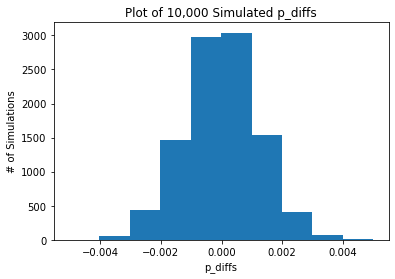

In [33]:
plt.hist(p_diffs);
plt.ylabel('# of Simulations')
plt.xlabel('p_diffs')
plt.title('Plot of 10,000 Simulated p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

Converting and saving p_diffs into a numpy array,

In [34]:
p_diffs = np.array(p_diffs)
p_diffs

array([-0.00076844, -0.00207557, -0.00168331, ..., -0.00044468,
       -0.0026882 ,  0.00043671])

Computing the actual difference observed in the csv dataset,

In [35]:
act_diffs = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
act_diffs

-0.0015790565976871451

Computation of mean of p_diffs greater than act_diff

In [36]:
(p_diffs > act_diffs).mean()

0.9031

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We have already calculated the p-value which is the probability of getting our statistic or a more extreme value if the null is true. More towards 1 is the probability of output and towards 0 is the probability of null.Larger p-value goes on to say that the statistic is more likely to come from our null hypothesis; hence, there is no statistical evidence to reject the null hypothesis which states that old page or new page does not have a big impact.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0] 

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [38]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3116075339133115, 0.905173705140591)

Importing the norm function to compute the significance of our z-score.

In [39]:
from scipy.stats import norm

norm.cdf(z_score)

0.905173705140591

Checking critical value at 95% confidence interval.

In [40]:
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

95% of Confidence Interval shown as 1.96 where as z_score is 1.31. and hence we found there is no statistical evidence to reject the null hypothesis. Moreover p-value is similar to the result obtained from our previous findings in j. and k.  This also endorses our null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We are studying rows with either conversions or no conversions which predicts a probability between 0 and 1. Accordingly, may be used.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

2 new features are added as 'intercept' and 'ab_page' , which is 1 when user id is in the treatment group else 0 for control group.

In [41]:
df2['intercept'] = 1
df2[['ab_page2', 'ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop('ab_page2', axis = 1)
df2.head()

user_id                   timestamp      group landing_page  converted  \
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
6   679687  2017-01-19 03:26:46.940749  treatment     new_page          1   
8   817355  2017-01-04 17:58:08.979471  treatment     new_page          1   
9   839785  2017-01-15 18:11:06.610965  treatment     new_page          1   

   intercept  ab_page  
2          1        1  
3          1        1  
6          1        1  
8          1        1  
9          1        1

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [42]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Tue, 04 May 2021   Pseudo R-squ.:               8.085e-06
Time:                        00:13:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

Earlier section p-value was 0.90, and now for ab_page we found its 0.19, a significant difference, is because for both the caes the null hypotheis and alternative hypothesis differing.

$$H_0: p_{old} - p_{new} \ge 0$$

$$H_1: p_{old} - p_{new} &lt; 0$$
$$H_0: p_{old} = p_{new}$$

$$H_1: p_{old} \ne p_{new}$$
$p_{old}$ and $p_{new}$ are the converted rates for the old and new pages respectively.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Other models may find outliers, and find other varibales which impact eh outocme and correlation errors also can trigger inaccurate results.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  We will provide the statistical output as well as a written response to answer this question.

In [55]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

country                   timestamp      group landing_page  \
user_id                                                               
630000       US  2017-01-19 06:26:06.548941  treatment     new_page   
630001       US  2017-01-16 03:16:42.560309  treatment     new_page   
630002       US  2017-01-19 19:20:56.438330    control     old_page   
630003       US  2017-01-12 10:09:31.510471  treatment     new_page   
630004       US  2017-01-18 20:23:58.824994  treatment     new_page   

         converted  intercept  ab_page  
user_id                                 
630000           0          1        1  
630001           1          1        1  
630002           0          1        0  
630003           0          1        1  
630004           0          1        1

In [56]:
df_new.country.unique()

array(['US', 'UK', 'CA'], dtype=object)

In [57]:
df_new[['UK', 'US']] = pd.get_dummies(df_new['country'])[['UK','US']]
df_new.head()

country                   timestamp      group landing_page  \
user_id                                                               
630000       US  2017-01-19 06:26:06.548941  treatment     new_page   
630001       US  2017-01-16 03:16:42.560309  treatment     new_page   
630002       US  2017-01-19 19:20:56.438330    control     old_page   
630003       US  2017-01-12 10:09:31.510471  treatment     new_page   
630004       US  2017-01-18 20:23:58.824994  treatment     new_page   

         converted  intercept  ab_page  UK  US  
user_id                                         
630000           0          1        1   0   1  
630001           1          1        1   0   1  
630002           0          1        0   0   1  
630003           0          1        1   0   1  
630004           0          1        1   0   1

In [58]:
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US', 'ab_page']])

In [59]:
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Tue, 04 May 2021   Pseudo R-squ.:               2.324e-05
Time:                        00:32:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
==============================================================================
"""

Looking at the p-value for UK and US , it is observed that there is no sigificant impact on the convesrion. For both cases p-value is > 0.05

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion. Create the necessary additional columns, and fit the new model.

Lets create interactive dummy variablesand to check the interaction has got any effect on page conversion.

In [60]:
#just to recall the dataframe
df_new

country                   timestamp      group landing_page  \
user_id                                                               
630000       US  2017-01-19 06:26:06.548941  treatment     new_page   
630001       US  2017-01-16 03:16:42.560309  treatment     new_page   
630002       US  2017-01-19 19:20:56.438330    control     old_page   
630003       US  2017-01-12 10:09:31.510471  treatment     new_page   
630004       US  2017-01-18 20:23:58.824994  treatment     new_page   
...         ...                         ...        ...          ...   
945994       UK  2017-01-03 14:41:21.565258    control     old_page   
945996       US  2017-01-09 18:58:19.952277  treatment     new_page   
945997       US  2017-01-04 06:56:24.658147    control     old_page   
945998       CA  2017-01-16 07:08:02.207969    control     old_page   
945999       US  2017-01-16 04:56:21.132067  treatment     new_page   

         converted  intercept  ab_page  UK  US  
user_id                                         
630000           0          1        1   0   1  
630001           1          1        1   0   1  
630002           0          1        0   0   1  
630003           0          1        1   0   1  
630004           0          1        1   0   1  
...            ...        ...      ...  ..  ..  
945994           0          1        0   1   0  
945996           0          1        1   0   1  
945997           0          1        0   0   1  
945998           0          1        0   0   0  
945999           0          1        1   0   1  

[290585 rows x 9 columns]

Interactive variables are obtained by multiplication of 2 variables and we are adding them as separate variables to the dataframe

In [61]:
df_new['UK_ab'] = df_new['UK']*df_new['ab_page']
df_new['US_ab'] = df_new['US']*df_new['ab_page']
df_new

country                   timestamp      group landing_page  \
user_id                                                               
630000       US  2017-01-19 06:26:06.548941  treatment     new_page   
630001       US  2017-01-16 03:16:42.560309  treatment     new_page   
630002       US  2017-01-19 19:20:56.438330    control     old_page   
630003       US  2017-01-12 10:09:31.510471  treatment     new_page   
630004       US  2017-01-18 20:23:58.824994  treatment     new_page   
...         ...                         ...        ...          ...   
945994       UK  2017-01-03 14:41:21.565258    control     old_page   
945996       US  2017-01-09 18:58:19.952277  treatment     new_page   
945997       US  2017-01-04 06:56:24.658147    control     old_page   
945998       CA  2017-01-16 07:08:02.207969    control     old_page   
945999       US  2017-01-16 04:56:21.132067  treatment     new_page   

         converted  intercept  ab_page  UK  US  UK_ab  US_ab  
user_id                                                       
630000           0          1        1   0   1      0      1  
630001           1          1        1   0   1      0      1  
630002           0          1        0   0   1      0      0  
630003           0          1        1   0   1      0      1  
630004           0          1        1   0   1      0      1  
...            ...        ...      ...  ..  ..    ...    ...  
945994           0          1        0   1   0      0      0  
945996           0          1        1   0   1      0      1  
945997           0          1        0   0   1      0      0  
945998           0          1        0   0   0      0      0  
945999           0          1        1   0   1      0      1  

[290585 rows x 11 columns]

In [62]:
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US', 'ab_page', 'UK_ab', 'US_ab']])

In [63]:
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Tue, 04 May 2021   Pseudo R-squ.:               3.483e-05
Time:                        00:35:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_ab          0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab          0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

Even after compariosn through interactive variables, we just found that still p value is 0.16 and 0.38 for UK-ab page and US ab page variables respectively. This clearly indicates the null hypothesis cannot be rejected and the old vs new page has no significant effect on the page conversion.

### Conclusion

After analyzing both the data sets through different approaches like Logistic regression and Z score test , we could not negate the null hypothesis which means that there is no significant impact of the new page vis a vis the old page for the users conversion. In business language it means that it will not be a good idea to waste resources on the new page as both the pages has got equal chances of converting the users.

In [128]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0